In [1]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Setting up the variables and dataset
fn = 'Data.nc'
data = xr.open_dataset(fn)
SM = data['SoilMoist_S_tavg']
Temp = data['AvgSurfT_tavg']
ET = data['Evap_tavg']
time = data['time']

In [3]:
# finding the 40th percentile of soil moisture at each raster
fourty_percentile = SM.quantile(0.4,dim='time')
fourty_percentile

C:\Users\I-SMART_Lab_03\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<xarray.DataArray 'SoilMoist_S_tavg' (lat: 38, lon: 41)>
array([[       nan,        nan,        nan, ..., 1.16405132, 1.18957272,
        1.01979418],
       [       nan,        nan,        nan, ..., 1.20828567, 0.99478111,
        0.99874672],
       [       nan,        nan,        nan, ..., 1.13843658, 1.15027957,
        1.19627891],
       ...,
       [       nan,        nan, 6.65389786, ..., 3.20984879, 3.1256825 ,
        3.0465672 ],
       [       nan,        nan, 6.65713224, ..., 3.27486   , 3.19038105,
        3.13392539],
       [       nan, 6.17374573, 6.59907417, ..., 3.42103744, 4.34405756,
        3.2912991 ]])
Coordinates:
  * lon       (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat       (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    quantile  float64 0.4

In [4]:
# checking whether the soil moisture value at each raster is less than the 40th percentile value we calculated above
SM_percentile_truth = SM<fourty_percentile

In [5]:
# calculating the standardized anomalies for temperature with the monthly means and monthly standard deviations (method 2)
Temp_monthly_means = Temp.groupby("time.month").mean("time")
Temp_monthly_std = Temp.groupby("time.month").std("time")
Temp_stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    Temp.groupby("time.month"),
    Temp_monthly_means,
    Temp_monthly_std,
)


In [6]:
# check whether Temp anomalies is greater than 1 standard deviation 
# standard deviation is based on monthly standard deviations
Temp_truth = Temp_stand_anomalies.groupby("time.month") > Temp_monthly_std
Temp_truth

<xarray.DataArray 'AvgSurfT_tavg' (time: 6909, lat: 38, lon: 41)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time     (time) datetime64[ns] 2003-02-01 2003-02-02 ... 2021-12-31
  * lon      (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat      (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    month    (time) int64 2 2 2 2 2 2 2 2 2 2 ... 12 12 12 12 12 12 12 12 12 12

In [7]:
# finding the standardized monthly means for evapotranspiration with monthly means and monthly standard deviations
ET_monthly_means = ET.groupby("time.month").mean("time")
ET_monthly_std = ET.groupby("time.month").std("time")
ET_stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    ET.groupby("time.month"),
    ET_monthly_means,
    ET_monthly_std,
)

In [8]:
# checking if ET anomaly is positive
ET_truth = ET_stand_anomalies > 0

In [9]:
ET_truth

<xarray.DataArray 'Evap_tavg' (time: 6909, lat: 38, lon: 41)>
array([[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False,  True, ...,  True,  True,  True],
        [False, False,  True, ...,  True,  True,  True],
        [False, False,  True, ...,  True,  True,  True]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
...
        ...,
        [False, False,  True, ...,  True, False, False],
        [False, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, False,  True]],

       [[False, False, False, ..., False, False,  True],
        [False, False, False, ..., False,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True, False],
        ...,
        [False, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, False, False]]])
Coordinates:
  * time     (time) datetime64[ns] 2003-02-01 2003-02-02 ... 2021-12-31
  * lon      (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat      (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    month    (time) int64 2 2 2 2 2 2 2 2 2 2 ... 12 12 12 12 12 12 12 12 12 12

In [10]:
# Now putting it all together
# checking if SM < 40th percentile, ET Anomaly is positive and Temperature anomaly is greater than one standard deviation
# Since truth values correspond to the number 1 and false values correspond to the value 0
# If we multiply the three conditions' truth values and the result is 1 this means that all conditions are true
# and there is a high chance that flash drought occured
truth_values = (SM_percentile_truth * ET_truth * Temp_truth ) == 1
truth_values

<xarray.DataArray (time: 6909, lat: 38, lon: 41)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time      (time) datetime64[ns] 2003-02-01 2003-02-02 ... 2021-12-31
  * lon       (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat       (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    quantile  float64 0.4
    month     (time) int64 2 2 2 2 2 2 2 2 2 2 ... 12 12 12 12 12 12 12 12 12 12

In [11]:
# This array does not tell us much since it is very big therefore we need methods to visualize this data
m = truth_values.mean(dim='time')
m

<xarray.DataArray (lat: 38, lon: 41)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00028948],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00043422, 0.00028948,
        0.00043422],
       ...,
       [0.        , 0.        , 0.00463164, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00159213, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0063685 , 0.00072369, ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
  * lon       (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat       (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    quantile  float64 0.4

Text(0.5, 1.0, 'mean of truth values')

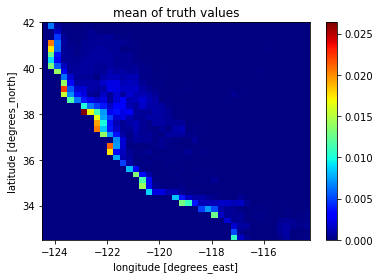

In [12]:
# plotting the mean of truth values
truth_values.mean(dim='time').plot(cmap='jet')
plt.title("mean of truth values")

Text(0.5, 1.0, 'areas with at least 1 flash drought event')

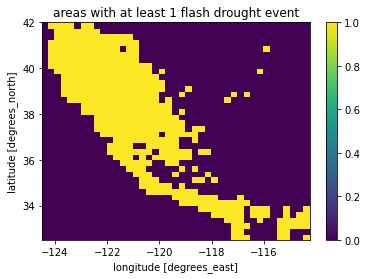

In [13]:
# looking at areas with atleast 1 flash drought event
fe = m>0
fe.plot()
plt.title("areas with at least 1 flash drought event")

In [14]:
# getting the sum of flash drought events
flashDroughtSum = truth_values.sum("time")
flashDroughtSum

<xarray.DataArray (lat: 38, lon: 41)>
array([[ 0,  0,  0, ...,  0,  0,  2],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  3,  2,  3],
       ...,
       [ 0,  0, 32, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  0,  0,  0],
       [ 0, 44,  5, ...,  0,  0,  0]])
Coordinates:
  * lon       (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat       (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    quantile  float64 0.4

Text(0.5, 1.0, 'Flash Drought Events')

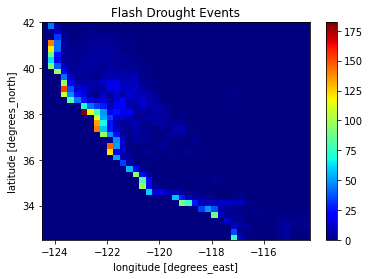

In [15]:
# plotting the count of flash drought events 
flashDroughtSum.plot(cmap='jet')
plt.title("Flash Drought Events")

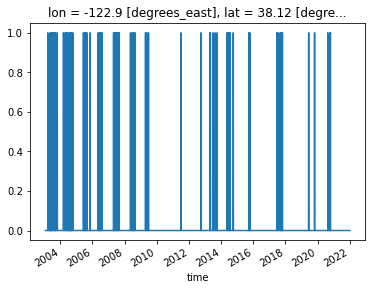

In [16]:
# looking at a specific location time series
location = truth_values.sel(lat=38.125,lon=-122.875)
location.plot()

In [17]:
# trying basemap with the data
map = Basemap(projection='merc',llcrnrlon=-124.375,llcrnrlat=32.625,urcrnrlon=-114.375,urcrnrlat=41.875,resolution='h') # projection, lat/lon extents and resolution of polygons to draw

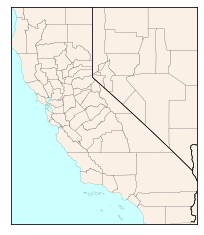

In [18]:
map.drawstates()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
map.drawcounties() # you can even add counties (and other shapefiles!)

In [19]:
# setting up the coordinates for the map
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lons,lats= np.meshgrid(lon,lat) 

<ipython-input-20-2b55e3934e43>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  freq = map.pcolormesh(x,y,flashDroughtSum,cmap='jet')


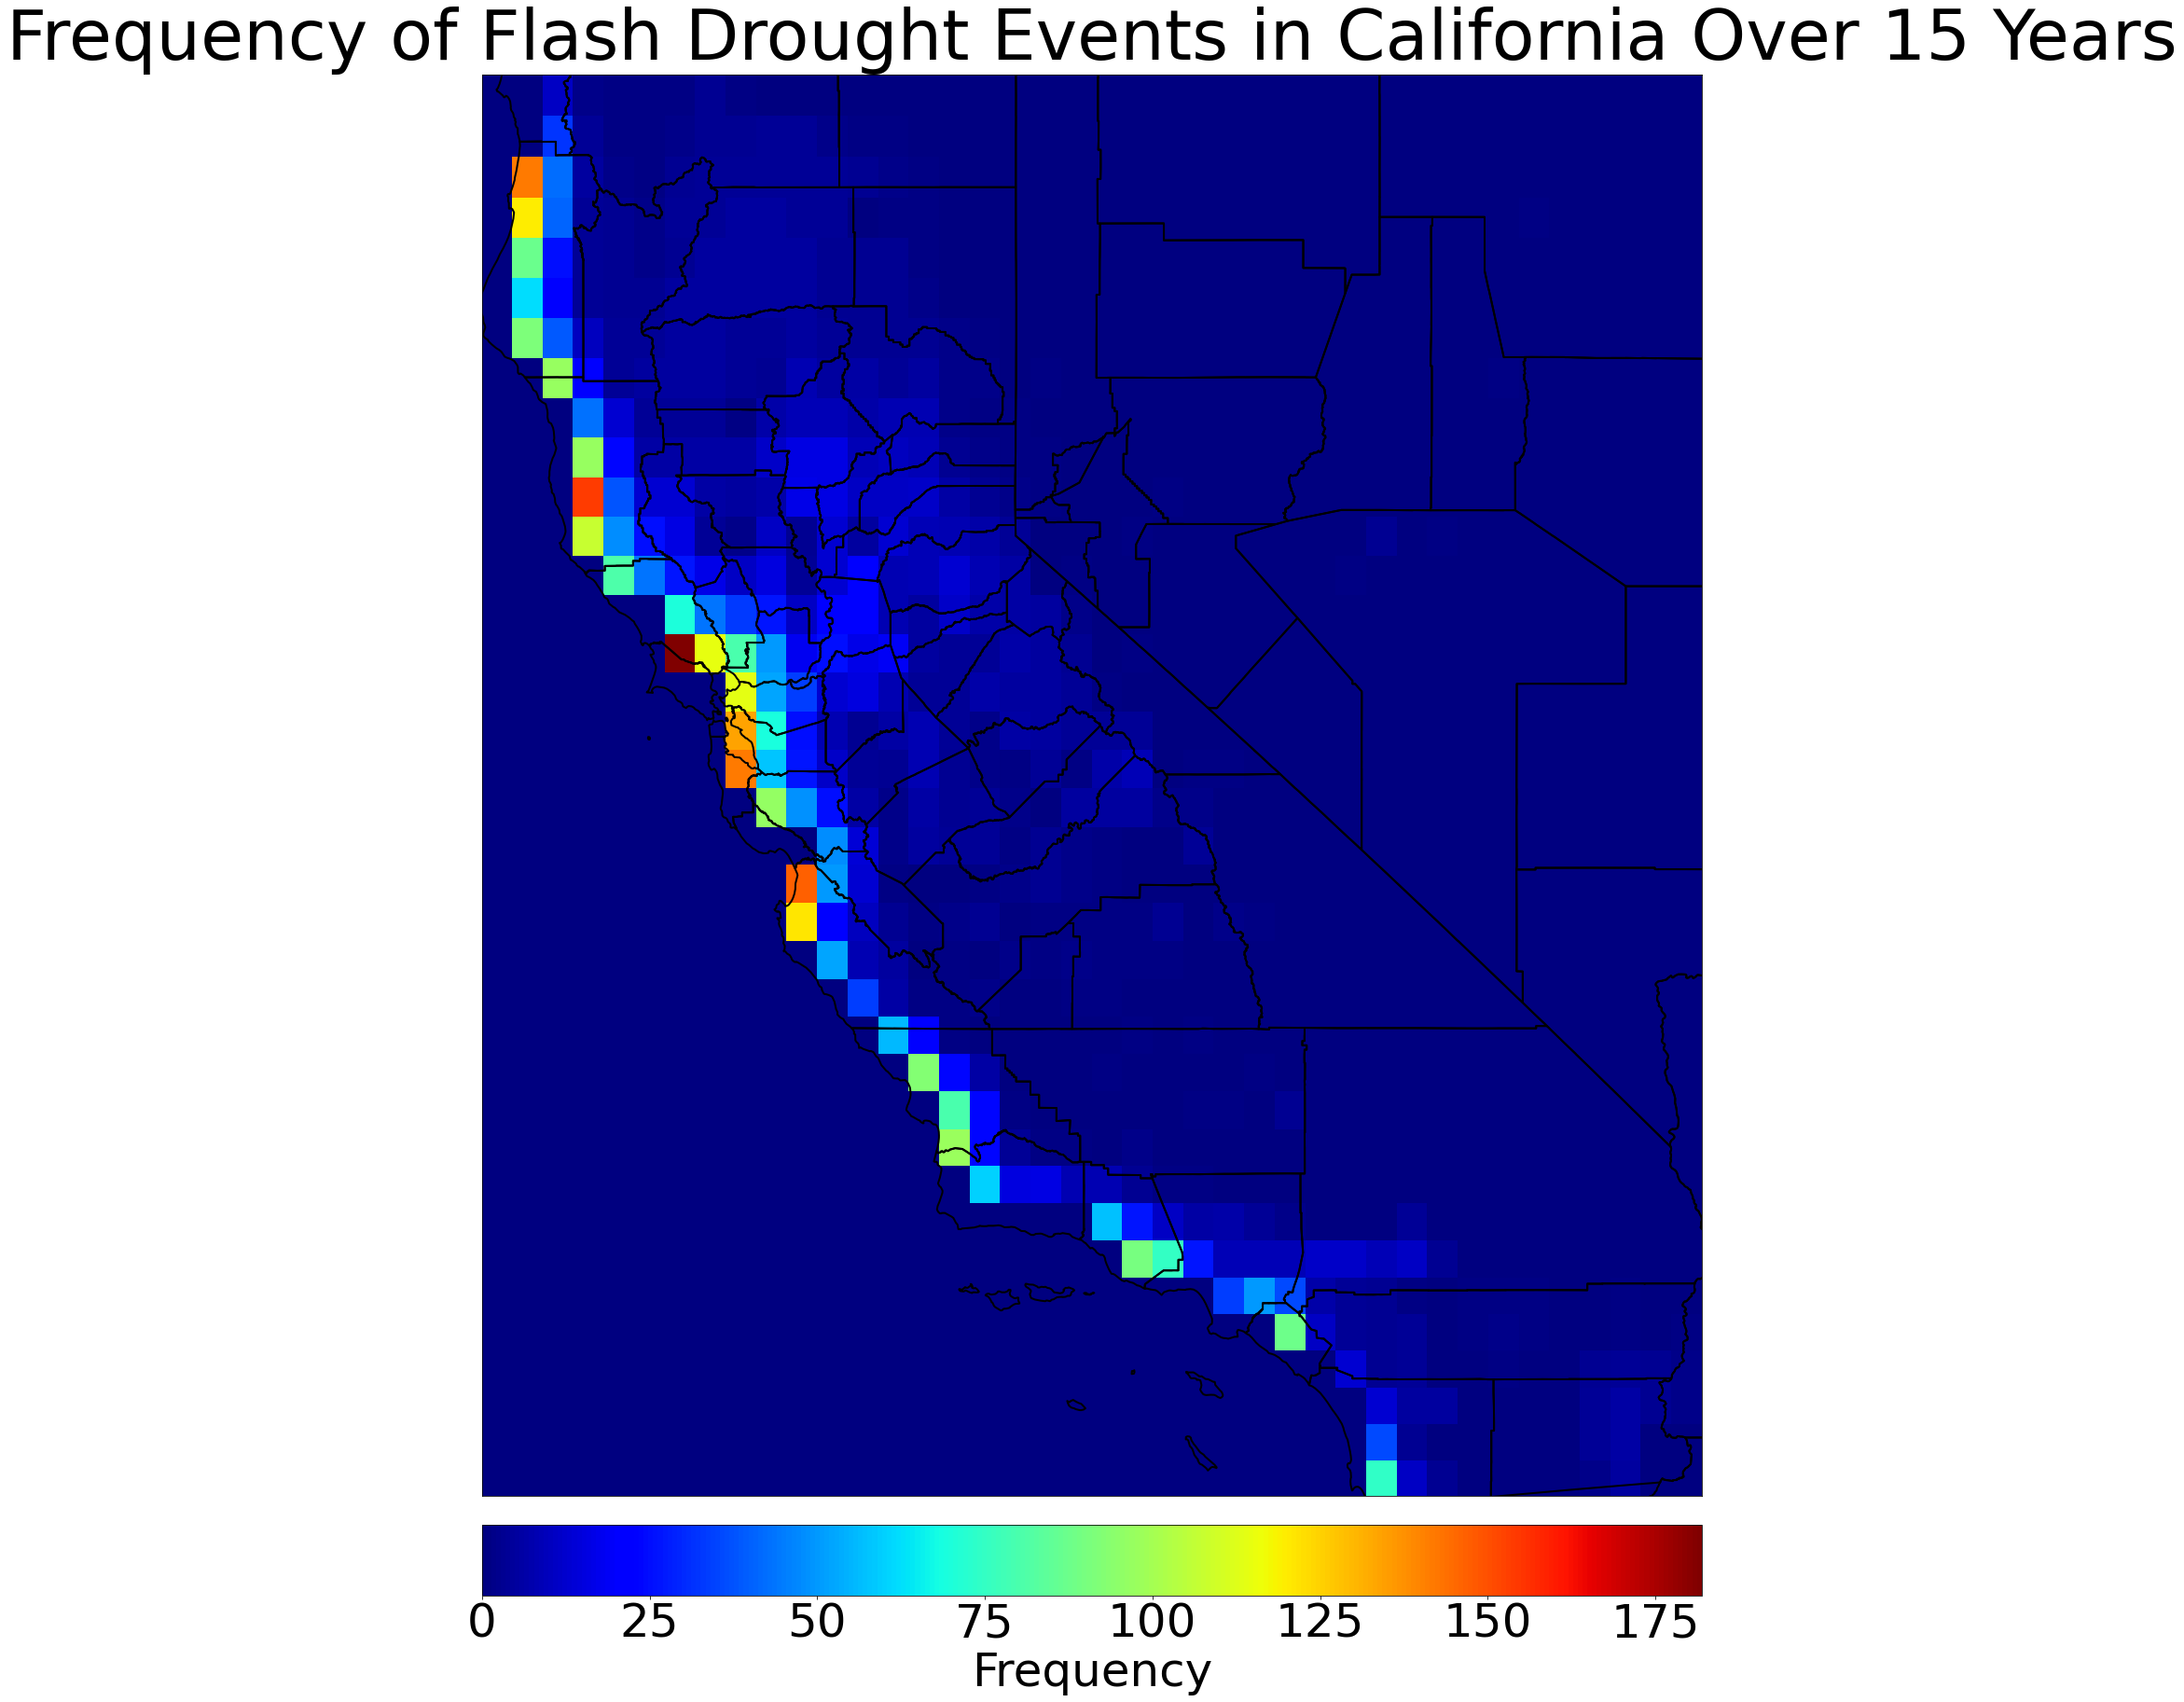

In [20]:
x,y = map(lons,lats)
# choose the size of the map
plt.figure(figsize=(60,30))
# if there is an error put shading='auto' 
# set the map to be a colormesh with jet color map
freq = map.pcolormesh(x,y,flashDroughtSum,cmap='jet')
# set the colorbar for the map
cb = map.colorbar(freq,"bottom", size="5%", pad="2%")
# set the size of the numbers in the colorbar
cb.ax.tick_params(labelsize=50)
# set size and name of colorbar title
cb.set_label('Frequency',size=50)
plt.title('Frequency of Flash Drought Events in California Over 15 Years',fontsize=75,pad="10")
map.drawcounties(color='black',linewidth=2) # you can even add counties (and other shapefiles!)

#parallels = np.arange(31,42,0.5) # make latitude lines ever 5 degrees from 30N-50N
#meridians = np.arange(-125,-115,0.5) # make longitude lines every 5 degrees from 95W to 70W
#map.drawparallels(parallels,labels=[1,0,0,0],fontsize=12)
#map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

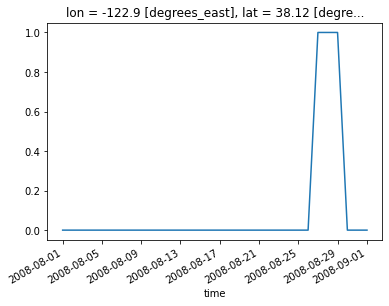

In [21]:
# looking at a specific location time series for a specific time period 
location1 = location.sel(time=slice('2008-08-01','2008-09-01'))
location1.plot()

In [23]:
# max interval of flash drought event
max_count = 0
count = 0
for element in location:
    if(element==1):
        count+=1
        if(count> max_count):
            max_count = count
    else:
        count = 0
print("the longest flash drought event lasted " + str(max_count) + " days")

the longest flash drought event lasted 8 days


In [24]:
# max interval of flash drought event function
def max_length(data):
    max_count = 0
    count = 0
    for element in data:
        if(element==1):
            count+=1
            if(count> max_count):
                max_count = count
        else:
            count = 0
    return max_count

In [25]:
# applying the function to one specific location
xr.apply_ufunc(max_length,location,input_core_dims=[["time"]])

<xarray.DataArray ()>
array(8)
Coordinates:
    lon       float32 -122.9
    lat       float32 38.12
    quantile  float64 0.4

In [48]:
# shows the frequency of flash drought events for the 12 different months
# shows that the highest frequency is from july-september
monthly_frequency = truth_values.groupby("time.month").sum(dim='time').sum(dim='lat').sum(dim='lon')
monthly_frequency

<xarray.DataArray (month: 12)>
array([ 104,   46,   33,   44,  306,  457, 1356, 2399,  798,  587,  103,
         57])
Coordinates:
    quantile  float64 0.4
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [44]:
# the amount of days in the dataset ordered by month
monthly_time = time.groupby("time.month").count(dim='time')
monthly_time

<xarray.DataArray 'time' (month: 12)>
array([558, 537, 589, 570, 589, 570, 589, 589, 570, 589, 570, 589])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [104]:
total_years = len(time.groupby("time.year"))
total_longitude = len(lon)
total_latitude = len(lat)
# flash drought duration
flashDrought_duration = 5
total_longitude

41

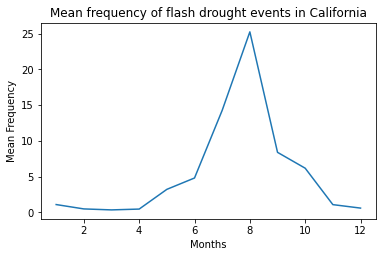

In [112]:
# shows the frequency of flash drought events for the 12 different months
# shows that the highest frequency is from july-september
# divide by 19 to get average since there are 19 years of data (2003-2021)
monthly_frequency = (truth_values.groupby("time.month").sum(dim='time').sum(dim='lat').sum(dim='lon')/total_years)/flashDrought_duration
monthly_frequency.plot()
plt.title("Mean frequency of flash drought events in California")
plt.xlabel("Months")
plt.ylabel("Mean Frequency")
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('FD.png', dpi=300)

### get the mean frequency of wildfire events and show the side by side comparison